In [1]:
import pandas as pd
import numpy as np
import warnings
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import keras
import geopandas as gpd
#import glob
warnings.filterwarnings('ignore')
os.chdir("Dataopen_1109")

Using TensorFlow backend.


In [10]:
data1 = pd.read_csv("dataset_1.csv")
data2 = pd.read_csv("dataset_2.csv")
data3 = pd.read_csv("dataset_3.csv")
data4 = pd.read_csv("dataset_4.csv")
data5 = pd.read_csv("dataset_5.csv")
data6 = pd.read_csv("dataset_6.csv")

In [11]:
data5.columns

Index(['year', 'month', 'ticker', 'list_date', 'company_name', 'icb_industry',
       'ice_supersector', 'country_of_incorporation', 'market_cap', 'eps',
       'p/e', 'p/s'],
      dtype='object')

In [36]:
data5['icb_industry'].unique()

array(['Financial Services', 'Industrial Goods & Services', 'Healthcare',
       'Media', 'Oil & Gas'], dtype=object)

In [96]:
data1.created_time = pd.to_datetime(data1.created)
data1.last_checked_time = pd.to_datetime(data1.last_checked)

data1.created_year = pd.DatetimeIndex(data1.created_time).year

In [95]:
data1[pd.Series(data1.created_time[i].year == 2014 for i in range(data1.shape[0]))]

,title,company_name,city,region,zip,created,last_checked,last_updated,delete_date,onet_occupation_code,SOC_occupation_code,url,stock_exchange_country,stock_exchange_name,stock_ticker,ticker_end_date,ticker_start_date
0,Plant Operator 3,Ecolab Inc.,Aberdeen,Scotland,AB25,2014-12-10T12:36:33+00:00,2014-12-14T15:38:40+00:00,NaN,2014-12-16T15:58:17+00:00,51-8013.00,8124,http://jobs.ecolab.com/job/Aberdeen-Plant-Oper...,US,NYS,ECL,NaN,1986-12-10
4,Application Engineer I,Ecolab Inc.,Aberdeen,Scotland,AB25,2014-01-07T22:48:08+00:00,2014-04-06T19:03:00+00:00,NaN,2014-04-08T19:27:57+00:00,15-1132.00,2136,http://jobs.ecolab.com/job/Aberdeen-Applicatio...,US,NYS,ECL,NaN,1986-12-10


In [100]:
data1.created_year == 2014

array([ True, False, False, False,  True, False, False, False, False,
       False])

In [4]:
# set the filepath and load in a shapefile
fp = 'Local_Authority_Districts_April_2019_Boundaries_UK_BUC.shp'
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()
map_df.areas = map_df.lad19nm.values.copy()
map_df.areas

array(['Hartlepool', 'Middlesbrough', 'Redcar and Cleveland',
       'Stockton-on-Tees', 'Darlington', 'Halton', 'Warrington',
       'Blackburn with Darwen', 'Blackpool',
       'Kingston upon Hull, City of', 'East Riding of Yorkshire',
       'North East Lincolnshire', 'North Lincolnshire', 'York', 'Derby',
       'Leicester', 'Harlow', 'Rutland', 'Nottingham',
       'Herefordshire, County of', 'Telford and Wrekin', 'Stoke-on-Trent',
       'Bath and North East Somerset', 'Bristol, City of',
       'North Somerset', 'South Gloucestershire', 'Plymouth', 'Torbay',
       'Swindon', 'Peterborough', 'Luton', 'Southend-on-Sea', 'Thurrock',
       'Medway', 'Bracknell Forest', 'West Berkshire', 'Reading',
       'Slough', 'Windsor and Maidenhead', 'Wokingham', 'Milton Keynes',
       'Brighton and Hove', 'Portsmouth', 'Southampton', 'Isle of Wight',
       'County Durham', 'Cheshire East', 'Cheshire West and Chester',
       'Shropshire', 'Cornwall', 'Isles of Scilly', 'Wiltshire',
      

In [11]:
result = pd.read_csv("EU_result_data.csv")
result_map = gpd.GeoDataFrame(result[['Region', 'Area_Code', 'Area','Pct_Remain', 'Pct_Leave']])
type(result_map)

map_df = map_df.rename(index = str, columns = {'lad19cd':'Area_Code'})#修改列名
map_df.head()

,objectid,Area_Code,lad19nm,lad19nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.676201,9.651231e+07,50488.387081,"POLYGON ((453098.3006999996 534104.2037000004,..."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544701,5.522915e+07,35506.404054,"POLYGON ((446483.8995000003 519130.1435000002,..."
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.567501,2.484090e+08,79150.715938,"POLYGON ((455049.5026000002 524684, 454677.099..."
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.556900,2.052315e+08,87566.678920,"POLYGON ((446483.8995000003 519130.1435000002,..."
4,5,E06000005,Darlington,None,428029,515648,-1.56835,54.535301,1.988128e+08,91926.839545,"POLYGON ((419709.2991000004 515678.2981000002,..."


In [19]:
#map_df.areas
merged = map_df.merge(result_map, on = 'Area_Code', how = 'left')
#merged = map_df.set_index('lad19cd').join(result_map.set_index("Area_Code"))
merged["lad19nmw"] = merged.Pct_Leave.values.copy()
merged = merged[merged["Pct_Leave"].isna()==False]

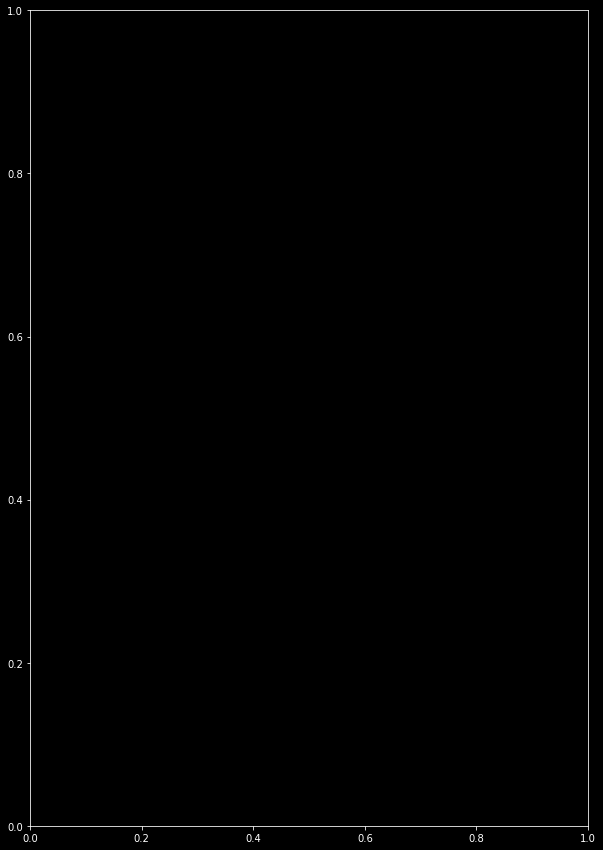

In [39]:
merged_new = merged[["geometry","Pct_Leave"]]
# set a variable that will call whatever column we want to visualise on the map
variable = "lad19nmw"
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 15))

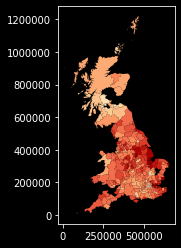

In [47]:
merged.plot(column = "Pct_Leave",cmap='OrRd')

In [41]:
ax.axis('off')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data 
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

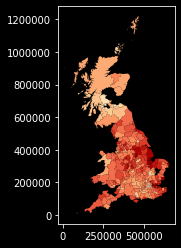

In [31]:
merged.plot(column = "Pct_Leave",cmap='OrRd')
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data 
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [ ]:
# Create colorbar as a legendsm = plt.cm.ScalarMappable(cmap=’Blues’, norm=plt.Normalize(vmin=vmin, vmax=vmax))# empty array for the data rangesm._A = []# add the colorbar to the figurecbar = fig.colorbar(sm)